In [1]:
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
N = 10000
NBINS = 16
BINS = np.linspace(0, 1, num=NBINS + 1)
RANGE = (-6, 6)
DOMAIN = np.linspace(*RANGE, num=1024)
PS = np.linspace(0.0, 1.0, num=11)

def generate_annotations(coefs, locs, scales, n):
    rng = np.random.default_rng(seed=90)
    y = rng.normal(locs, scales, size=(n, len(coefs)))
    y = y[np.arange(n), rng.choice(len(coefs), size=n, p=coefs)]
    y = np.expand_dims(y, axis=-1)
    return y

def pdf(y, coefs, locs, scales):
    return np.sum(coefs * norm.pdf(y, locs, scales), axis=-1, keepdims=True)

def cdf(y, coefs, locs, scales):
    return np.sum(coefs * norm.cdf(y, locs, scales), axis=-1, keepdims=True)

def plot_annotations(ax, y):
    ax.scatter(y, np.zeros_like(y), label="annotation")
    ax.set_xlabel("y")

def plot_distribution(ax, x, coefs, locs, scales):
    ps = [coef * norm.pdf(x, loc, scale) for coef, loc, scale in zip(coefs, locs, scales)]
    p = np.sum(np.stack(ps), axis=0)
    ax.plot(x, p)
    ax.set_xlabel("y")
    ax.set_ylabel("p(y)")

def pit_histogram(y, pis, mus, sigmas):
    cdfs = cdf(y, pis, mus, sigmas)
    return np.histogram(cdfs, density=True, bins=BINS)[0]

def plot_pit_histogram(ax, y, pis, mus, sigmas):
    densities = pit_histogram(y, pis, mus, sigmas)
    ax.stairs(densities, BINS)
    ax.set_xlabel("PIT")
    ax.set_ylabel("density")

def calibration_plot(ax, y, pis, mus, sigmas):
    cdfs = cdf(y, pis, mus, sigmas)
    ps_hat = [np.sum(cdfs < p) / len(cdfs) for p in PS]
    ax.plot(PS, ps_hat, marker="o")
    ax.legend()

def get_grid():
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    return ax0, ax1, ax2

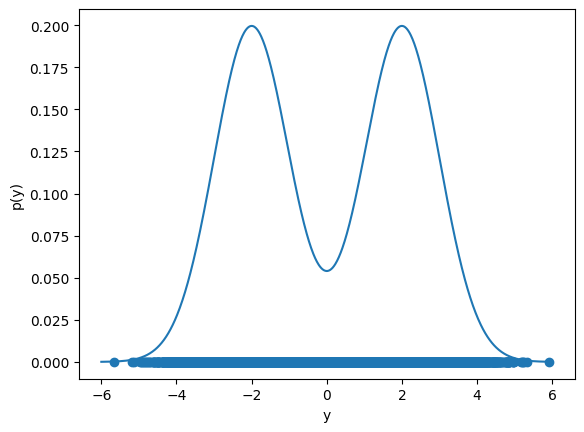

In [3]:
coefs_multi = (0.5, 0.5)
locs_multi = (-2, 2)
scales_multi = (1, 1)
y_multi = generate_annotations(coefs_multi, locs_multi, scales_multi, N)
_, ax = plt.subplots()
plot_annotations(ax, y_multi)
plot_distribution(ax, DOMAIN, coefs_multi, locs_multi, scales_multi)

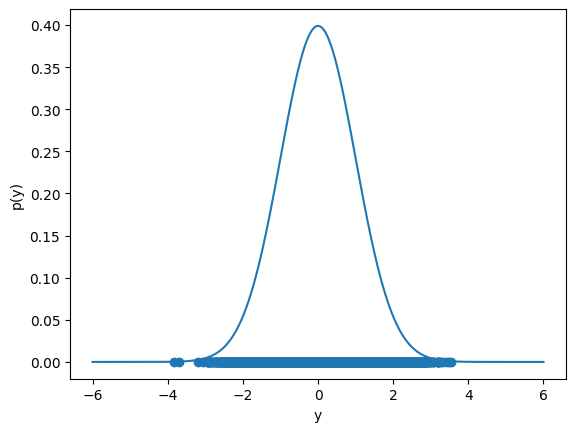

In [4]:
coefs_uni = (1, )
locs_uni = (0, )
scales_uni = (1, )
y_uni = generate_annotations(coefs_uni, locs_uni, scales_uni, N)
_, ax = plt.subplots()
plot_annotations(ax, y_uni)
plot_distribution(ax, DOMAIN, coefs_uni, locs_uni, scales_uni)

In [6]:
# unimodal prediction
pis_uni = np.ones((N, 1))
mus_uni = np.full((N, 1), 0)
#rng = np.random.default_rng(seed=71)
#mus_uni = rng.choice([-2, 2], size=(N, 1))
sigmas_uni = np.ones((N, 1))
pis_uni.shape, mus_uni.shape, sigmas_uni.shape

((10000, 1), (10000, 1), (10000, 1))

In [7]:
# multimodal prediction
pis_multi = np.full((N, 2), 0.5)
mus_multi = np.full((N, 2), 2)
mus_multi[:, 0] = -2
sigmas_multi = np.full((N, 2), 1)
pis_multi.shape, mus_multi.shape, sigmas_multi.shape

((10000, 2), (10000, 2), (10000, 2))

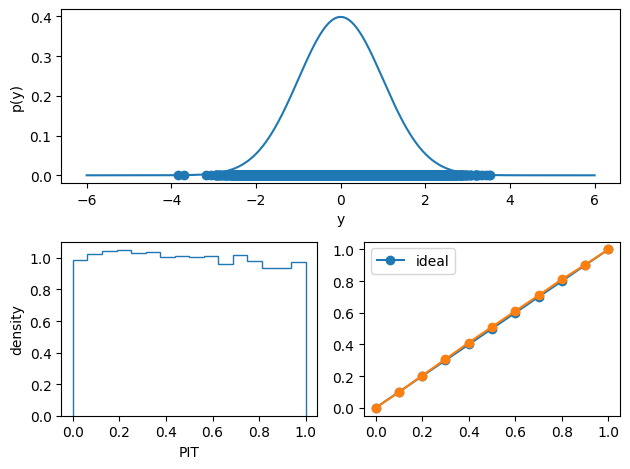

In [10]:
ax0, ax1, ax2 = get_grid()
plot_annotations(ax0, y_uni)
plot_distribution(ax0, DOMAIN, coefs_uni, locs_uni, scales_uni)
plot_pit_histogram(ax1, y_uni, pis_uni, mus_uni, sigmas_uni)
ax2.plot(PS, PS, marker="o", label="ideal")
calibration_plot(ax2, y_uni, pis_uni, mus_uni, sigmas_uni)

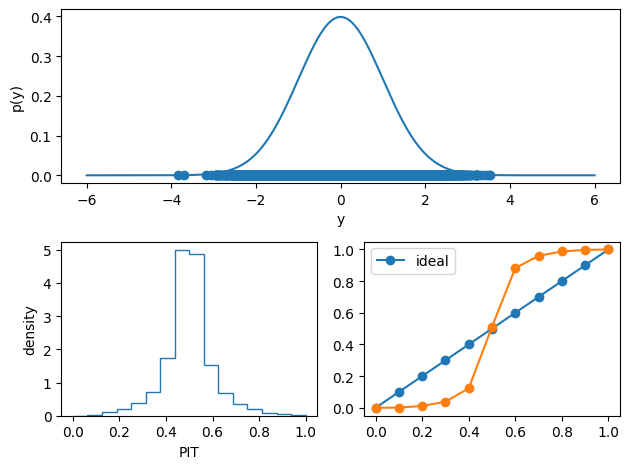

In [11]:
ax0, ax1, ax2 = get_grid()
plot_annotations(ax0, y_uni)
plot_distribution(ax0, DOMAIN, coefs_uni, locs_uni, scales_uni)
plot_pit_histogram(ax1, y_uni, pis_multi, mus_multi, sigmas_multi)
ax2.plot(PS, PS, marker="o", label="ideal")
calibration_plot(ax2, y_uni, pis_multi, mus_multi, sigmas_multi)

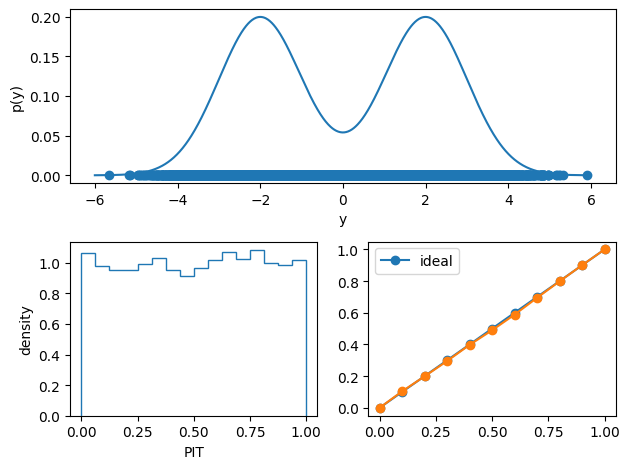

In [12]:
ax0, ax1, ax2 = get_grid()
plot_annotations(ax0, y_multi)
plot_distribution(ax0, DOMAIN, coefs_multi, locs_multi, scales_multi)
plot_pit_histogram(ax1, y_multi, pis_multi, mus_multi, sigmas_multi)
ax2.plot(PS, PS, marker="o", label="ideal")
calibration_plot(ax2, y_multi, pis_multi, mus_multi, sigmas_multi)

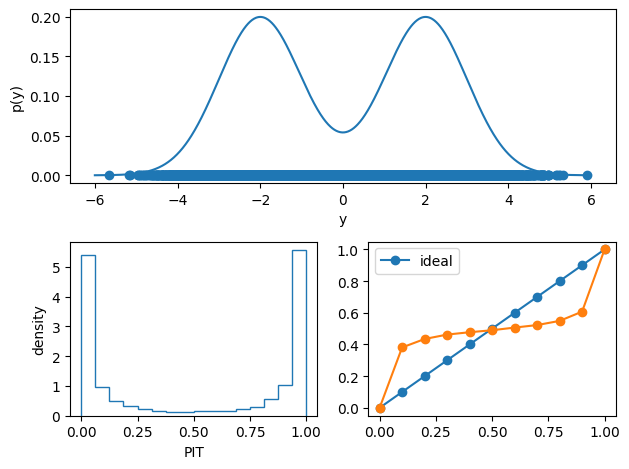

In [13]:
ax0, ax1, ax2 = get_grid()
plot_annotations(ax0, y_multi)
plot_distribution(ax0, DOMAIN, coefs_multi, locs_multi, scales_multi)
plot_pit_histogram(ax1, y_multi, pis_uni, mus_uni, sigmas_uni)
ax2.plot(PS, PS, marker="o", label="ideal")
calibration_plot(ax2, y_multi, pis_uni, mus_uni, sigmas_uni)

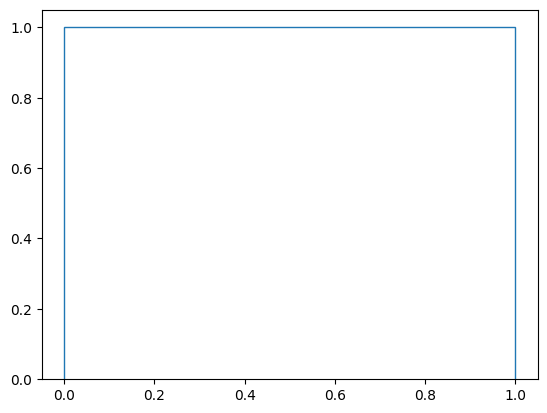

In [17]:
calibrated = np.full(NBINS, 1.)
plt.stairs(calibrated, BINS)

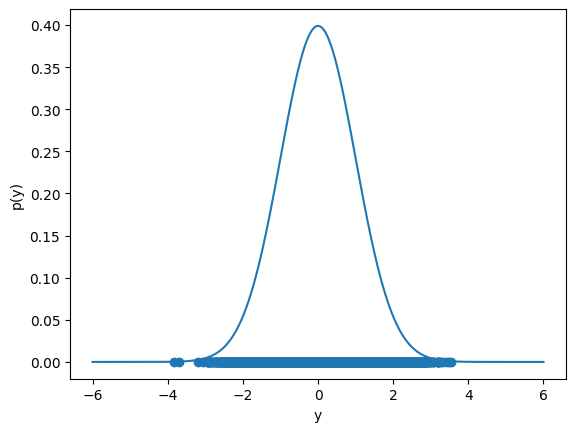

In [30]:
_, ax = plt.subplots()
plot_annotations(ax, y_uni)
plot_distribution(ax, DOMAIN, coefs_uni, locs_uni, scales_uni)

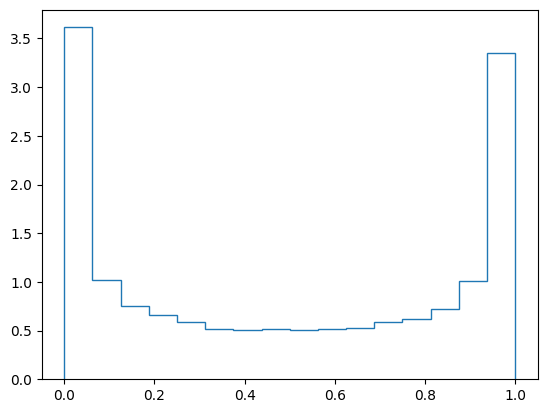

In [28]:
under_05 = pit_histogram(y_uni, pis_uni, mus_uni, np.full((N, 1), 0.5))
under_
plt.stairs(under_05, BINS)